# Imoprt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from dython.nominal import associations
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import category_encoders as ce

In [2]:
def LoadDataFrame(path):
    df = pd.read_csv(path)
    return df

In [3]:
def CreatDataFrame(data):
    df = pd.DataFrame(Data)
    return df

In [4]:
path = "./CSV_Document/AsosDataOptimize/AsosDataOptimize.csv"
df = LoadDataFrame(path)
df.drop(columns="Unnamed: 0",inplace=True)

# The Relationship between Columns

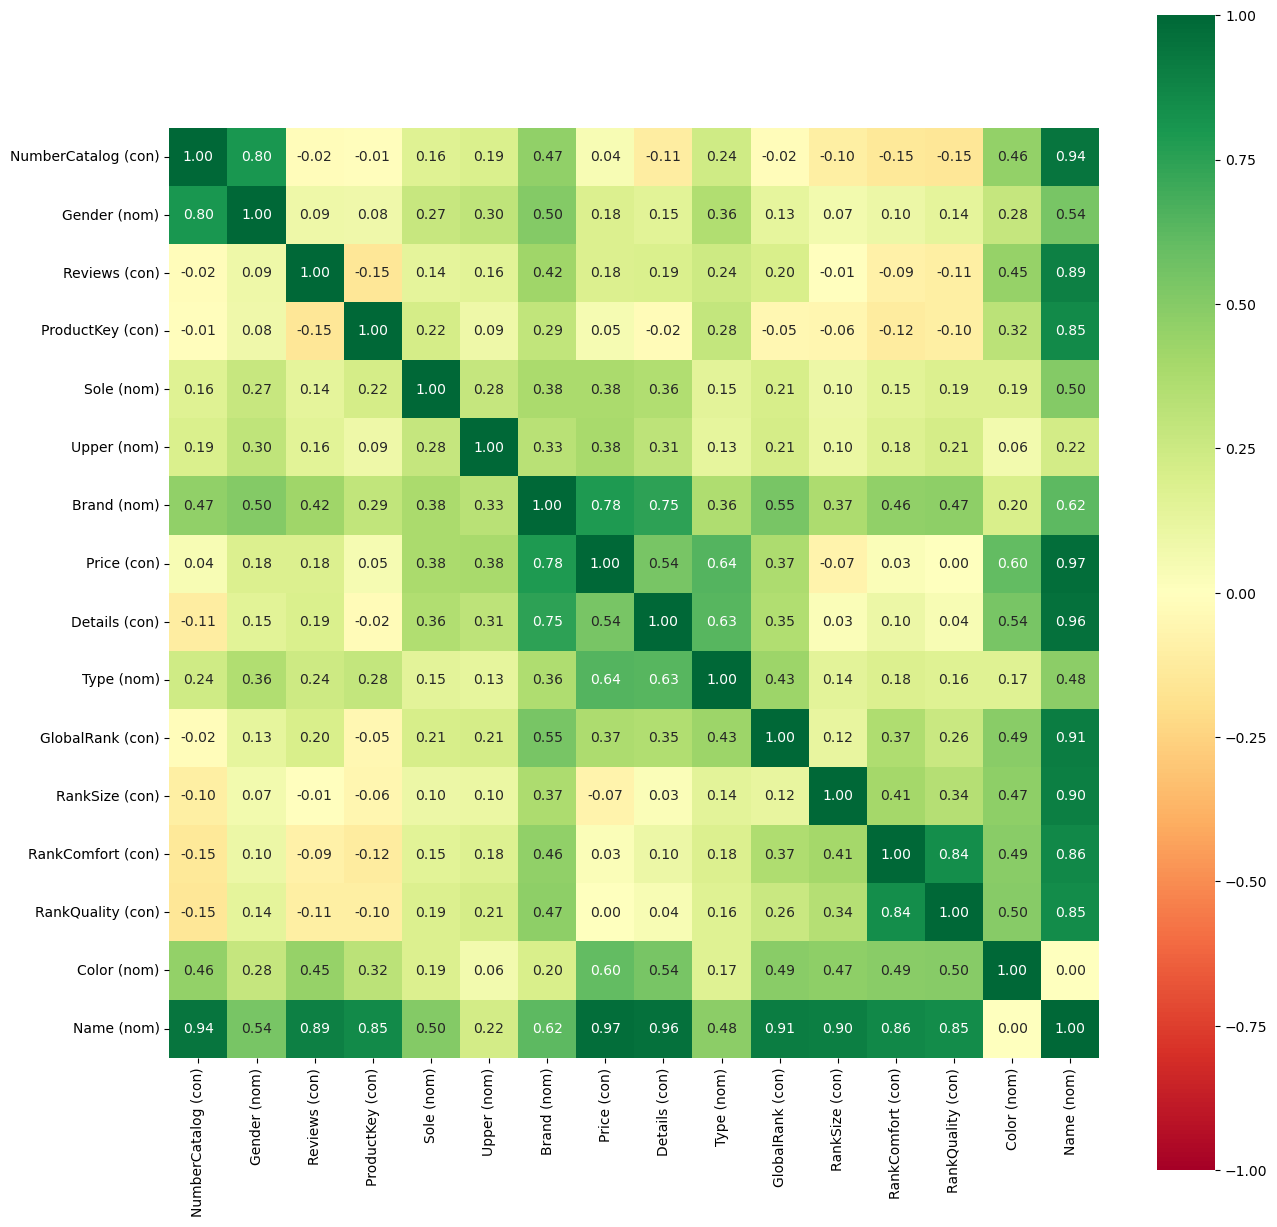

In [5]:
ax = associations(df, figsize = (15, 15), cmap='RdYlGn', mark_columns = True, clustering=True)
plt.show()

# Create Relationship Between Category Colums

In [6]:
def ConvertCategory(df, Column):
    df_Temp = df.copy()
    BestColumn = []
    uniqueColumn = df_Temp[Column].unique()
    for x in uniqueColumn:
        Column_Dic = {"Name": -1 , "Count": -1 , "Price": -1}
        Column_Dic["Name"] = x
        Column_Dic["Count"] = df_Temp[Column].value_counts()[x]
        BestColumn.append(Column_Dic)
    BestColumn = sorted(BestColumn, key=lambda x: x['Count'],reverse=True)
    count=1
    for x in BestColumn:
        for row in range(df.shape[0]):
            if df_Temp.loc[row,Column] == x["Name"]:
                df_Temp.loc[row,Column] = count
        count+=1
    return df_Temp

In [7]:
df1 = ConvertCategory(df ,"Upper")
df1 = ConvertCategory(df1 ,"Brand")
df1 = ConvertCategory(df1 ,"Color")
df1 = ConvertCategory(df1 ,"Type")
df1 = ConvertCategory(df1 ,"Gender")
df1 = ConvertCategory(df1 ,"Sole")

# Method MeachineLearning

In [8]:
from sklearn.model_selection import train_test_split
def MeachineLearning(df,label,features,IsEncoder):

    X = df[features]
    y = df[label]

    df_copy = df.copy()
    #--->Encoder The Category values
    if IsEncoder:
        encoder= ce.BinaryEncoder(cols = features ,return_df = True)
        X = encoder.fit_transform(df_copy[features])
        print("-->Learning By: "+str(features))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if IsEncoder:
    #--->The Split Table to Train and Tests
        print("\n-->Initial amount of samples: #{}".format(X.shape[0]))
        print("   Number of training samples: #{}".format(X_train.shape[0]))
        print("   Number of test samples: #{}".format(X_test.shape[0]))

    #--->Fit Method
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model , X , X_test, y_test

In [9]:
#--->Describe output for model
def DescribeModel(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score
    print("\n--->Predicting")
    print("\tDisplaying information re:")
    y_pred = model.predict(X_test)
   
    print("\t1. RMAE: ", mean_absolute_error(y_true=y_test, y_pred=y_pred)) #the lower the value the better 
    print("\t2. R^2 : ", r2_score(y_test, y_pred)) # closer to 1 but not 1, the better
        
    coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_)),key=lambda x: x[1]))
    coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
    print('\nCoefficient for every feature:\n')
    print(coef_table)

In [10]:
model , X  , X_test, y_test= MeachineLearning(df1 ,label = 'Price',features = ["Brand"] , IsEncoder=False)
model1  , X1 , X_test1, y_test1 = MeachineLearning(df1 ,label = 'Price',features = ["Type"] , IsEncoder=False)
model2  , X2  , X_test2, y_test2 = MeachineLearning(df1 ,label = 'Price',features = ["Details"] , IsEncoder=False)
model3  , X3  , X_test3 , y_test3 = MeachineLearning(df1 ,label = 'Price',features = ["Color"] , IsEncoder=False)

# EDA MeachineLearning

C:\Users\danie\AppData\Local\Temp\ipykernel_2684\3030357243.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X ,model.predict(X), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2684\3030357243.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X1 ,model1.predict(X1), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2684\3030357243.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X2 ,model2.predict(X2), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2684\3030357243.py:8: UserWarning: col

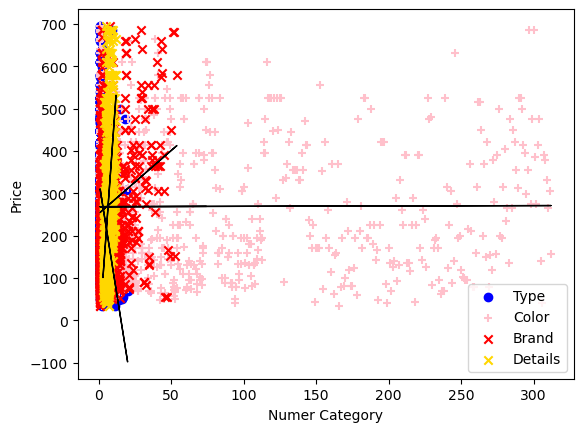

In [12]:
plt.scatter(x=df1["Type"] ,y=df1["Price"] , c='b' , marker='o' ,label='Type')
plt.scatter(x=df1["Color"] ,y=df1["Price"] , c='pink' , marker='+' ,label='Color')
plt.scatter(x=df1["Brand"] ,y=df1["Price"] , c='r' , marker='x' ,label='Brand')
plt.scatter(x=df1["Details"] ,y=df1["Price"] , c='gold' , marker='x' ,label='Details')
plt.plot(X ,model.predict(X), 'k' , color="black" , linewidth=1)
plt.plot(X1 ,model1.predict(X1), 'k' , color="black" , linewidth=1)
plt.plot(X2 ,model2.predict(X2), 'k' , color="black" , linewidth=1)
plt.plot(X3 ,model3.predict(X3), 'k' , color="black" , linewidth=1)
plt.legend(numpoints=1 , loc=4)
plt.xlabel("Numer Category")
plt.ylabel("Price")
plt.show()

# Option I

In [13]:
modelTop  , XTop  , X_testTop, y_testTop = MeachineLearning(df ,label = 'Price',features = ["Brand","Details","Type","Color"],IsEncoder=True)
DescribeModel(modelTop ,X_testTop, y_testTop)

-->Learning By: ['Brand', 'Details', 'Type', 'Color']

-->Initial amount of samples: #1798
   Number of training samples: #1438
   Number of test samples: #360

--->Predicting
	Displaying information re:
	1. RMAE:  71.77075574812606
	2. R^2 :  0.5655413627424822

Coefficient for every feature:

    Attributes  Coefficient
0          4.0     0.619075
1          3.0     1.645049
2         20.0     4.496201
3          9.0     4.515161
4         22.0     5.658222
5         17.0     7.214832
6         16.0     7.552423
7         23.0     9.492519
8         18.0    10.913071
9         19.0    12.802053
10        21.0    14.395511
11        13.0    17.712279
12        14.0    21.468037
13         7.0    26.193511
14        11.0    28.098847
15        15.0    37.612945
16         8.0    43.589101
17         5.0    48.331570
18         6.0    78.250025
19         1.0    79.260277
20        12.0   104.262751
21        10.0   104.862977
22         0.0   107.396946
23         2.0   124.497963


# Option II

In [14]:
modelTop1  , XTop1  , X_testTop1, y_testTop1 = MeachineLearning(df ,label = 'Price',features = ["Brand", "Color", "Details","Gender","GlobalRank","Reviews","Type","Upper","Sole"],IsEncoder=True)
DescribeModel(modelTop1 ,X_testTop1, y_testTop1)

-->Learning By: ['Brand', 'Color', 'Details', 'Gender', 'GlobalRank', 'Reviews', 'Type', 'Upper', 'Sole']

-->Initial amount of samples: #1798
   Number of training samples: #1438
   Number of test samples: #360

--->Predicting
	Displaying information re:
	1. RMAE:  70.53704585574786
	2. R^2 :  0.5848960219268988

Coefficient for every feature:

    Attributes   Coefficient
0         37.0  1.776357e-15
1         30.0  8.260323e-02
2         31.0  3.296669e-01
3         26.0  1.244590e+00
4         28.0  1.459143e+00
5          4.0  2.218968e+00
6         27.0  2.450030e+00
7          3.0  3.204845e+00
8         25.0  3.359656e+00
9         18.0  3.493925e+00
10        13.0  4.687528e+00
11        19.0  4.901129e+00
12        20.0  4.901129e+00
13        40.0  5.822411e+00
14        11.0  5.919068e+00
15         7.0  6.740279e+00
16         8.0  7.703271e+00
17        43.0  8.317069e+00
18        24.0  9.754824e+00
19        29.0  9.926673e+00
20        23.0  1.066255e+01
21         9.0